In [6]:
import pandas as pd

ruta_archivo = 'Walmart.csv'
df_walmart = pd.read_csv(ruta_archivo)

# Convierte la columna 'Date' a tipo datetime especificando el formato
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'], format='%d-%m-%Y')

# Define las fechas de los eventos festivos
super_bowl_dates = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'])
labor_day_dates = pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'])
thanksgiving_dates = pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'])
christmas_dates = pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'])

# Agrega columnas para indicar si una semana corresponde a un evento festivo
df_walmart['Super_Bowl'] = df_walmart['Date'].isin(super_bowl_dates)
df_walmart['Labor_Day'] = df_walmart['Date'].isin(labor_day_dates)
df_walmart['Thanksgiving'] = df_walmart['Date'].isin(thanksgiving_dates)
df_walmart['Christmas'] = df_walmart['Date'].isin(christmas_dates)

# Muestra las primeras filas del DataFrame para verificar las nuevas columnas
print(df_walmart.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Super_Bowl  Labor_Day  Thanksgiving  Christmas  
0  211.096358         8.106       False      False         False      False  
1  211.242170         8.106        True      False         False      False  
2  211.289143         8.106       False      False         False      False  
3  211.319643         8.106       False      False         False      False  
4  211.350143         8.106       False      False         False      False  


In [8]:
# Muestra los descriptivos resumen de las variables numéricas
desc_numericas = df_walmart.describe()
print("Descriptivos resumen de variables numéricas:")
print(desc_numericas)

# Muestra información sobre todas las columnas para identificar variables categóricas
info_columnas = df_walmart.info()
print("\nInformación sobre todas las columnas para identificar variables categóricas:")
print(info_columnas)

Descriptivos resumen de variables numéricas:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8

In [9]:
# Evalúa si la base contiene datos perdidos
datos_perdidos = df_walmart.isnull().sum()

# Muestra el recuento de datos perdidos por columna
print("Recuento de datos perdidos por columna:")
print(datos_perdidos)

Recuento de datos perdidos por columna:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64


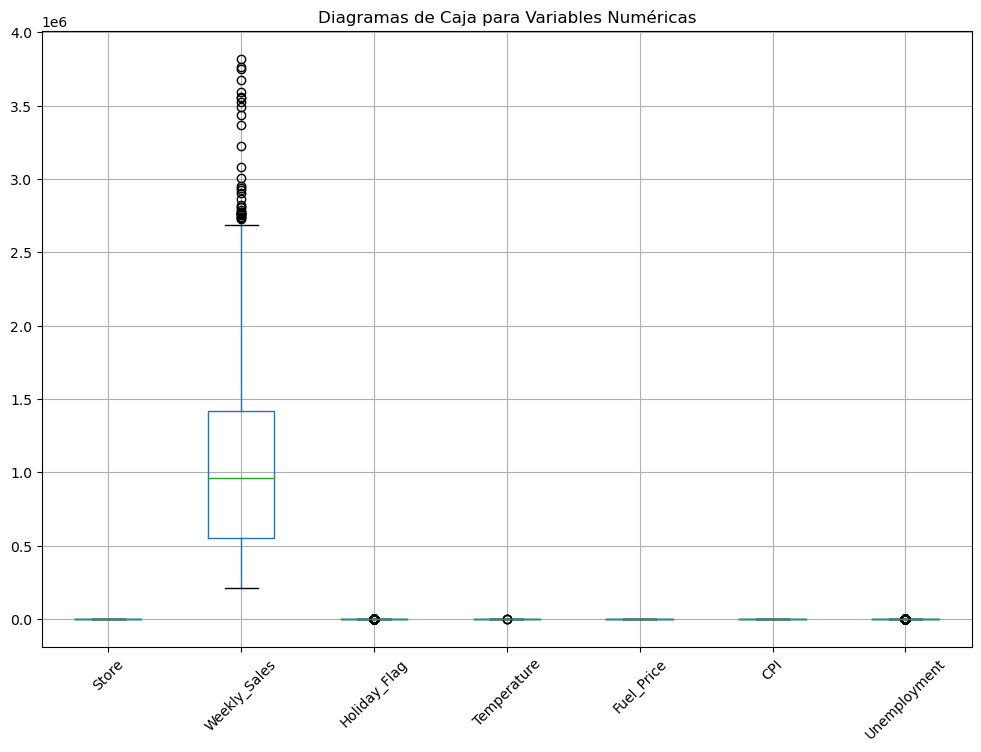

Estadísticas descriptivas para Variables Numéricas:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293

In [11]:
import matplotlib.pyplot as plt
# Selecciona solo las variables numéricas
df_numericas = df_walmart.select_dtypes(include=['int64', 'float64'])

# Visualización de diagramas de caja para las variables numéricas
plt.figure(figsize=(12, 8))
df_numericas.boxplot()
plt.title("Diagramas de Caja para Variables Numéricas")
plt.xticks(rotation=45)
plt.show()

# Estadísticas descriptivas para las variables numéricas
desc_numericas = df_numericas.describe()
print("Estadísticas descriptivas para Variables Numéricas:")
print(desc_numericas)

<Figure size 1000x600 with 0 Axes>

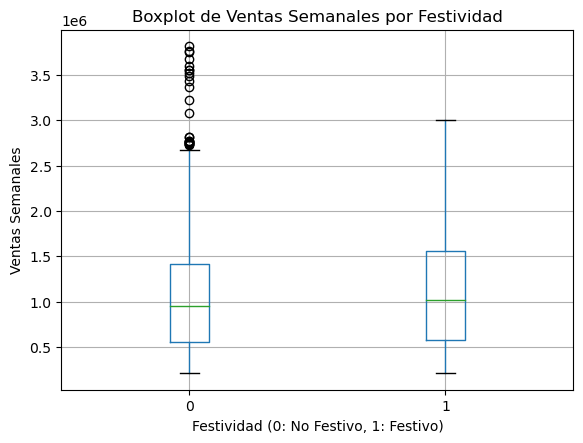

In [12]:
# Visualización de Boxplots para Ventas Semanales en Festivos y No Festivos
plt.figure(figsize=(10, 6))
df_walmart.boxplot(column='Weekly_Sales', by='Holiday_Flag')
plt.title("Boxplot de Ventas Semanales por Festividad")
plt.xlabel("Festividad (0: No Festivo, 1: Festivo)")
plt.ylabel("Ventas Semanales")
plt.suptitle("")
plt.show()

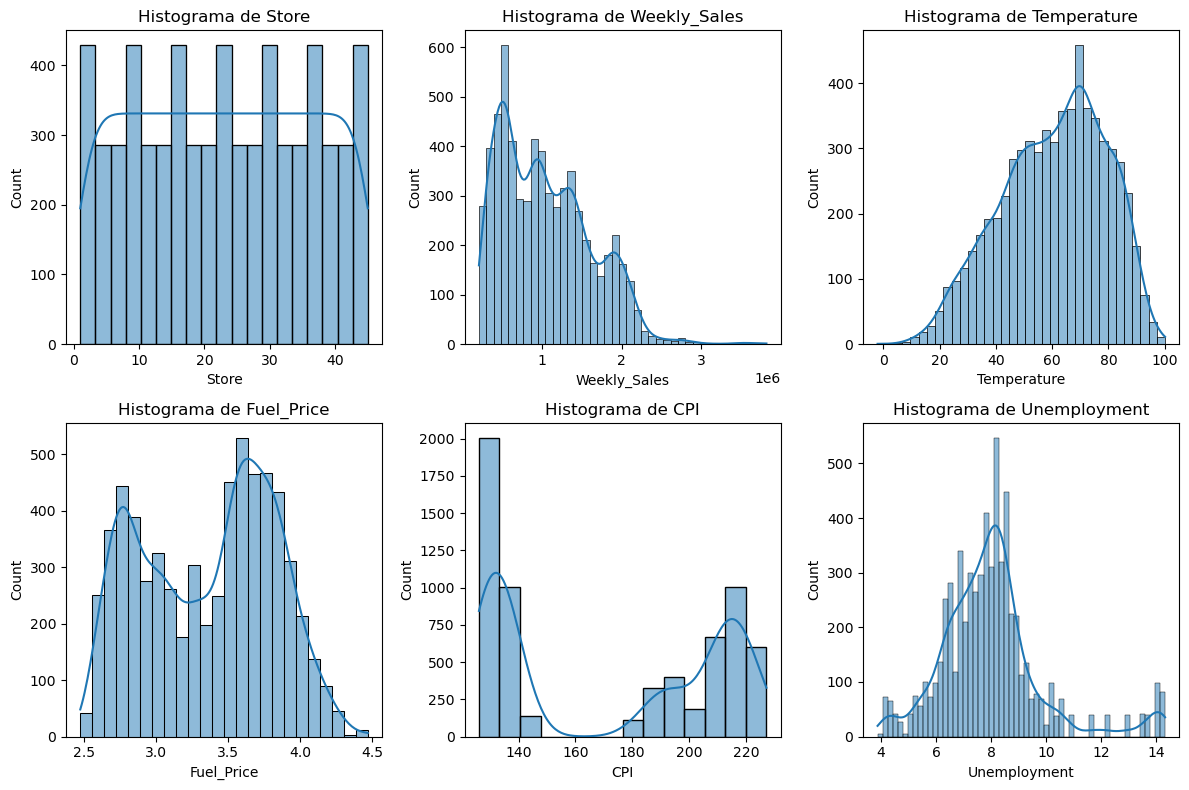

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define el tamaño de la figura
plt.figure(figsize=(12, 8))

# Grafica histogramas para las variables numéricas
num_vars = ['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i, var in enumerate(num_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_walmart[var], kde=True)
    plt.title(f'Histograma de {var}')

# Ajusta el espaciado entre los subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()


In [18]:
# Selecciona solo las columnas numéricas
numeric_data = df_walmart.select_dtypes(include='number')

# Calcula las correlaciones entre las variables numéricas
correlation_matrix = numeric_data.corr()

# Visualiza la matriz de correlación
print(correlation_matrix)


                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000  


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Seleccionar solo las columnas numéricas para calcular los cuartiles
numeric_columns = df_walmart.select_dtypes(include=[np.number])

# Eliminar outliers usando el método del rango intercuartílico (IQR)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1
df_walmart = df_walmart[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Dividir los datos en conjunto de entrenamiento y prueba después de eliminar outliers
X = df_walmart[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df_walmart['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características utilizando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selección de características utilizando Random Forest
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar búsqueda de hiperparámetros utilizando GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Obtener el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test_selected)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)
print("Coeficiente de determinación (R^2):", r2)



Error cuadrático medio (MSE): 12019075807.734554
Error absoluto medio (MAE): 68156.89253849047
Coeficiente de determinación (R^2): 0.9621164961127455


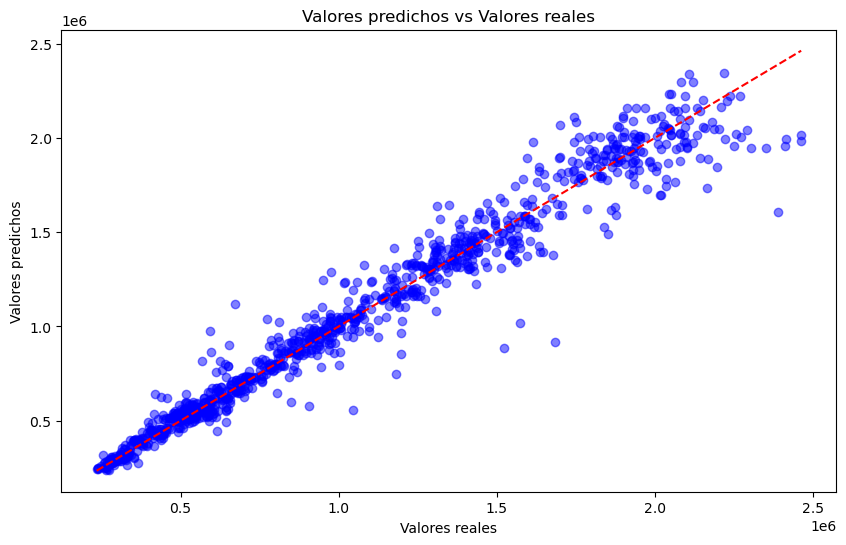

In [39]:
import matplotlib.pyplot as plt

# Graficar los valores predichos vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores predichos vs Valores reales')
plt.show()

In [46]:

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()]

# Entrenar un modelo de Random Forest con las características seleccionadas
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_selected, y_train)

# Obtener la importancia de las características seleccionadas
feature_importance = rf.feature_importances_

# Crear un DataFrame para mostrar las importancias de las características junto con sus nombres
feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importance
})

# Ordenar el DataFrame por importancia en orden descendente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame ordenado
print(feature_importance_df)


  Feature  Importance
0   Store    0.791286
1     CPI    0.208714
